## Problem Metadata 
DO NOT DELETE. This is a JSON Block. The metadata and course context MUST be in the first cell. 

```json
{
    "problem_title": "rankineRegenerativeCyclePyCalor",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Power Cycles",
    "lecture_reference": {
        "lecture_id": "1_dm5zknvs",
        "subtopics": [
            {
              "key": "Fa25-L10b-5.0",
              "title": "The ideal Regenerative Rankine cycle",
            }
        ]
    },
    "book_reference": {
        "chapter_number": 10,
        "title": "Vapor and Combined Power Cycles",
        "sections": [
            "The Ideal Regenerative Rankine Cycle"
        ]
    },
    "notes": ""
}

## 1. Problem Statement

The Ideal Regenerative Rankine Cycle
Consider a steam power plant operating on the ideal regenerative Rankine cycle with one open feedwater heater. Here are the states:
- (1) after the condenser, entering the pump;
- (2) after the pump, entering the feedwater heater;
- (3) after the feedwater heater, entering the second pump;
- (4) after the second pump, entering the boiler;
- (5) after the boiler, entering the turbine;
- (6) after the turbine, entering the feedwater heater;
- (7) after the turbine, entering the condenser.

Steam enters the high-pressure turbine at $p_5$ and $T_5$. Steam then enters the feedwater heater at $p_6$. Steam is then condensed in the condenser at a pressure of $p_7$. 

**Goal:** Determine:
* the fraction of steam extracted from the turbine, $y$;
* the thermal efficiency of this cycle, $\eta_\text{th}$.

## 2. Schematic 
```
+--------------+
|              |
|             (4)
|              |
|              v
|    +-------------------+
|    |                   |
|    |       Boiler      |-----> Heat in (Q_in)
|    |                   |
|    +-------------------+
|              |
|             (5)
|              |
|              v
|    +-------------------+
|    |                   |
|    |      Turbine      |-----> Work out (W_out)
|    |                   |
|    +-------------------+
|        |            |
|       (6)          (7)
|        |            |
|        v            v
|    +--------+   +-----------+
|    |  Open  |   |           |
|    |  Feed  |   | Condenser |
|    |  Water |   |           |
|    | Heater |   +-----------+
|    +--------+         |   
|      |    ^           |
|     (3)   |          (1)
|      |    +----+      |
|      v         |      v
|    +--------+  |  +--------+
|    |  Pump  |  |  |  Pump  | 
|    +--------+  |  +--------+
|        |       |       |
|       (4)      +--(2)--+
|        |
+ -------+  
```

## 3. Assumptions and Approximations
### A. General (Cycle-Wide) Assumptions
1.  **Steady-State/Steady-Flow:** For each device in the cycle ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
2.  **Overall Energy:** All changes in **Kinetic Energy ($\Delta KE$) and Potential Energy ($\Delta PE$)** are negligible between components, except where explicitly calculated (e.g., for a nozzle or diffuser).
3.  ***Property Model and Analysis Method:*** 
    * **Property tables: `pyCalor` (Accurate):**
        * **Purpose:** Must be used for determining water properties. 
        * **Tools:** Properties ($h$, $s$, $T$, and $p$) are retrieved directly from a **thermodynamic property library** (e.g., **`pyCalor`**). Since it is a pure substance we only need to know two independent properties.

---

### B. Component-Specific Assumptions

1.  **Conservation of Mass:** For all devices operating at steady-flow, the mass entering is equal to the mass exiting: **$\dot{m}_{\text{in}} = \dot{m}_{\text{out}}$**).
2.  **Conservation of Energy (First Law):** The **Steady-Flow Energy Equation** is applied to determine work and heat transfer.
3.  **Entropy Balance (Second Law):** The **Entropy Balance for a Control Volume Equation** is applied to determine changes in entropy.

#### 1-2. Pump
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_P$)**.

#### 2-3. Open Feedwater Heater (FWH)
* **Adiabatic:** $\dot{Q}=0$.
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 3-4. Pump
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_P$)**.

#### 4-5. Boiler
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 5-6. Turbine
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_T$)**.

#### 6-3. Open Feedwater Heater (FWH)
* **Adiabatic:** $\dot{Q}=0$.
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 5-7. Turbine
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_T$)**.

#### 7-1. Condenser
* Idealized as a **Heat Exchanger** rejecting heat out of the cycle
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

## 4. Physical Laws
### Control Volumes:
1.  **First Law of Thermodynamics (Energy Balance for Control Volume):**
    $$\frac{dE_\text{CV}}{dt} = \dot{E}_\text{in} - \dot{E}_\text{out}$$

2.  **Conservation of Mass (Mass Balance for a Control Volume):**
    $$\frac{dm_\text{CV}}{dt} = \dot{m}_\text{in} - \dot{m}_\text{out}$$
    
3.  **Entropy Balance (Second Law for a Control Volume):**
    $$\frac{dS_\text{CV}}{dt} = \dot{S}_\text{in} - \dot{S}_\text{out} + \dot{S}_\text{gen}$$

### Steady-Flow Analysis
Since each devices operates as a **Steady-Flow** device we can write: 

**Mass Balance:**
For the boiler (single inlet and outlet):
$$\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$$

For the turbine:

$$\dot{m}_{5-6} = y\dot{m}$$
$$\dot{m}_{5-7} = (1-y)\dot{m}$$

**Energy Balance:**
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} + \frac{w_\text{in}^2}{2} + g z_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} + \frac{w_\text{out}^2}{2} + g z_\text{out} \right)$$

Neglecting kinetic and potential energy effects:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} \right)$$

**Entropy Balance:**
$$\dot{S}_\text{gen} = \dot{S}_\text{out} - \dot{S}_\text{in}$$

Assuming that the process is adiabatic and reversible (isentropic), we have:
$$\dot{S}_\text{out} = \dot{S}_\text{in}$$

and

$$\dot{m}_\text{out}s_\text{out} = \dot{m}_\text{in}s_\text{in}$$

Therefore,

$$s_\text{in} = s_\text{out}$$

### Device Governing Equations (First Law)
We can write our steady-flow energy equation for each device by applying the appropriate **Assumptions and Approximations** listed above.

For the pump (1-2):
$$\dot{W}_\text{in} =  \dot{m} (1-y) \left(h_\text{2a} - h_1\right)$$

For the open feedwater heater (2-3, 6-3):
$$y\dot{m} h_\text{6a} + (1-y)\dot{m}h_\text{2a}= \dot{m} h_3 $$

For the pump (3-4):
$$\dot{W}_\text{in} =  \dot{m} \left(h_\text{4a} - h_3\right)$$

For the boiler (4-5):
$$\dot{Q}_\text{in} = \dot{m} \left(h_5 - h_\text{4a} \right)$$

For the turbine (5-6, 5-7):
$$\dot{W}_\text{out} = \dot{m} h_5 - y \dot{m} h_\text{6a} - (1-y) \dot{m} h_\text{7a}$$

For the condenser (7-1):
$$\dot{Q}_\text{out} = \dot{m} (1-y) \left(h_\text{4a} - h_1 \right)$$


### Isentropic Efficiency (Linking Actual and Ideal States)

Since this is the ideal regenerative Rankine cycle, the pumps and turbine operate isentropically.

In [7]:
# 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th

substance = 'water'

# state 5
T5_C = 600
p5_MPa = 15
T5_K = T5_C + 273.15

# state 6
p6_MPa = 1.2

# state 7
p7_MPa = 10/1000

# state 1
x1 = 0
p1_MPa = p7_MPa
P1 = p1_MPa
st1 = th.state(substance,p=(P1,'Mpa'),x=x1,name='1')
T1 = st1.T # K
s1 = st1.s # kJ/kg*K
h1 = st1.h # kJ/kg
v1 = st1.v # m3/kg

# state 2
p2_MPa = p6_MPa
P2 = p2_MPa        # MPa
s2 = s1            # kJ/kg*K
st2 = th.state(substance,p=(P2,'Mpa'),s=(s2,'kJ/kg K'),name='2')
T2 = st2.T # K
h2 = st2.h # kJ/kg

# state 3
x3 = 0
# $$p_3 = p_2 = p_6$$ 
# $$\dot{m} h_3  = \dot{m} h_6  y + \dot{m} h_7 (1 - y)$$
p3_MPa = p2_MPa
P3 = p3_MPa # definition of isobaric, MPa
st3 = th.state(substance,p=(P3,'Mpa'),x=x3,name='3')
T3 = st3.T
h3 = st3.h # kJ/kg
s3 = st3.s # kJ/kg*K
v3 = st3.v

# state 4
s4 = s3
p4_MPa = p5_MPa
P4 = p4_MPa
st4 = th.state(substance,p=(P4,'Mpa'),s=(s4,'kJ/kg K'),name='4')
T4 = st4.T # K
h4 = st4.h # kJ/kg

# state 5 (continued)
P5 = p5_MPa
T5 = T5_K
st5 = th.state(substance,p=(P5,'Mpa'),T=(T5_K,'K'),name='5')
h5 = st5.h # kJ/kg
s5 = st5.s #kJ/kg/K

# state 6 (continued)
# We assume that the turbine operates isentropically, therefore $s_6 = s_5$. We also recall that $p_3 = p_2 = p_6$ 
s6 = s5
P6 = P2
st6 = th.state(substance,p=(P6,'Mpa'),s=(s6,'kJ/kg K'),name='6')
h6 = st6.h
x6 = st6.x
T6 = st6.T

# state 7 (continued)
s7 = s5
P7 = p7_MPa
st7 = th.state(substance,p=(P7,'Mpa'),s=(s7,'kJ/kg K'),name='7')
h7 = st7.h
x7 = st7.x
T7 = st7.T

(a) The value of y is: 0.23 (-)
The condenser heat duty is 1486.68 kJ/kg
The boiler heat duty is: 2769.16 kJ/kg
(b) The overall efficiency is 46.31%.
The Carnot efficiency of this power plant is 63.47%.


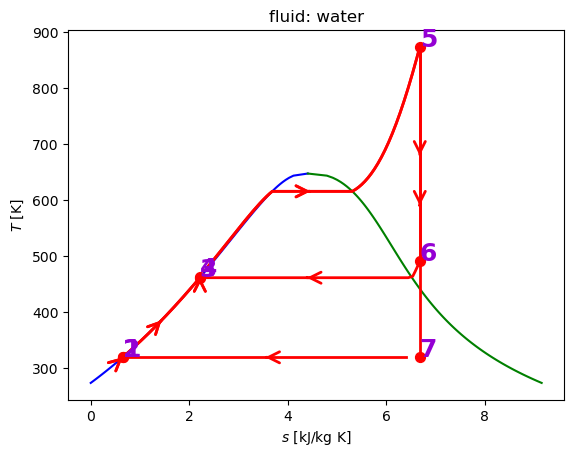

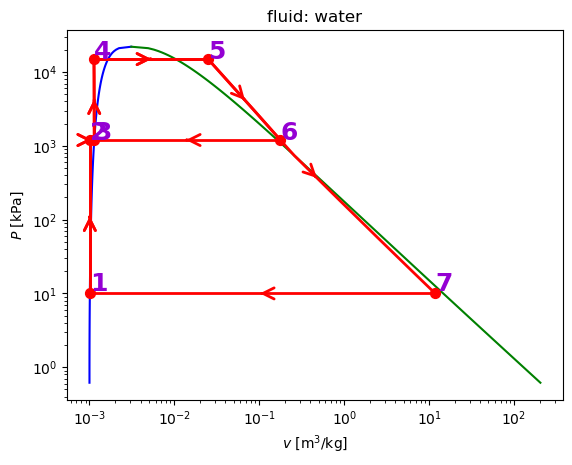

In [8]:
# 6 Calculations (Code Cell)
# $y$ is the fraction of steam extracted from the turbine, $y = \frac{\dot{m}_6}{\dot{m}_5}$.
# We can analyze the Open FWH.
# $$y = \frac{h_3 - h_2}{h_6 - h_2} $$
y = (h3- h2)/(h6 - h2)
print('(a) The value of y is: {0:1.2f} (-)'.format(y))

Qc = (1-y)*(h7 - h1) # kJ/kg
print('The condenser heat duty is {0:1.2f} kJ/kg'.format(Qc))

Qb = (h5 - h4) # heat required to make the steam, kJ/kg
print('The boiler heat duty is: {0:1.2f} kJ/kg'.format(Qb))

eta = 1 - Qc/Qb
print('(b) The overall efficiency is {0:1.2%}.'.format(eta))

# It is instructive to compare the efficiency we calculated here with the Carnot efficiency. Recall that:
# $\eta_\text{Carnot} = 1 - \frac{T_\text{C}}{T_\text{H}}$.
TC_K = T1
TH_K = T5
eta_carnot = 1 - TC_K / TH_K
print('The Carnot efficiency of this power plant is {0:1.2%}.'.format(eta_carnot))

#pr = th.process([(st1,st2),(st2,st3),(st3,st4),(st4,st5),(st5,st7),(st7,st1)])
pr = th.process([(st1,st2),(st2,st3),(st3,st4),(st4,st5),(st5,st7),(st7,st1),(st1,st2),(st2,st3),(st3,st4),(st4,st5),(st5,st6),(st6,st3)])
fig1 = pr.plot('Ts');
fig2 = pr.plot('pv');

## 7. Summary and Reasoning
We see that by using regeneration we are able to increase the temperature of the water prior to entering the boiler. That means that we are transferring heat in at a high temperature, which should result in a higher thermal efficiency. Here we've used an open feedwater system, but one can also use a closed waterfeed system too. 

THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---